<a href="https://colab.research.google.com/github/JunetzMasihBelajar/2025_AI_TI1B/blob/main/Jobsheet8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latihan

## 1. Decision Tree

In [ ]:
import pandas as pd

# Membaca file iris.csv
iris = pd.read_csv('Iris.csv')

In [ ]:
# Melihat informasi dataset
iris.info()

# melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

In [ ]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [ ]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  0.933


In [ ]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

## 2. Linear Regression

In [ ]:
import numpy as np

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])

#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

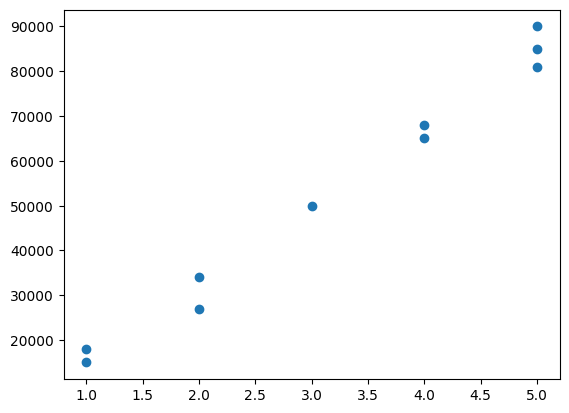

In [ ]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

In [ ]:
from sklearn.linear_model import LinearRegression

# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

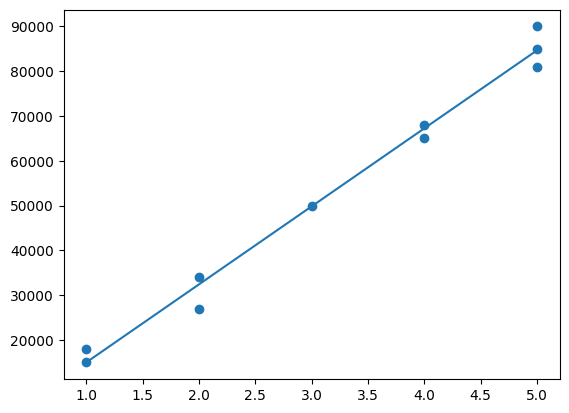

In [ ]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))


In [ ]:
# Data testing
# Jumlah kamar yang ingin diprediksi harganya
X_test = np.array([[6], [7]])

# Melakukan prediksi harga kamar
y_pred = linreg.predict(X_test)

# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", y_pred[i])
    print()

Jumlah kamar: 6
Prediksi harga kamar: 102110.16949152542

Jumlah kamar: 7
Prediksi harga kamar: 119542.37288135593



In [ ]:
# uji akurasi model
linreg.score(X_test, y_pred)

1.0

## 3. Logistic Regression

In [ ]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

# jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,False,True
1,35,20000,0,False,True
2,26,43000,0,True,False
3,27,57000,0,True,False
4,19,76000,0,False,True
...,...,...,...,...,...
395,46,41000,1,True,False
396,51,23000,1,False,True
397,50,20000,1,True,False
398,36,33000,0,False,True


In [ ]:
# pisahkan atribut dan label
predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased']

In [ ]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns= X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [ ]:
from sklearn.model_selection import train_test_split

# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn import linear_model

# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# uji akurasi model
model.score(X_test, y_test)

0.825

# Tugas Praktikum


## Tugas 1

### Import Library

In [ ]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from graphviz import Source
from IPython.display import Image, display
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

### Load Dataset

In [ ]:
# load dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')
dataset.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


### Menampilkan Properti Data

In [ ]:
dataset.shape

(400, 5)

In [ ]:
dataset.dtypes

,0
ID,int64
Jenis_Kelamin,object
Umur,int64
Gaji,int64
Transaksi,int64


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             400 non-null    int64 
 1   Jenis_Kelamin  400 non-null    object
 2   Umur           400 non-null    int64 
 3   Gaji           400 non-null    int64 
 4   Transaksi      400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset.describe()

,ID,Umur,Gaji,Transaksi
count,4.000000e+02,400.000000,4.000000e+02,400.000000
mean,1.569154e+07,37.655000,1.046138e+09,0.357500
std,7.165832e+04,10.482877,5.114544e+08,0.479864
min,1.556669e+07,18.000000,2.250000e+08,0.000000
25%,1.562676e+07,29.750000,6.450000e+08,0.000000
50%,1.569434e+07,37.000000,1.050000e+09,0.000000
75%,1.575036e+07,46.000000,1.320000e+09,1.000000
max,1.581524e+07,60.000000,2.250000e+09,1.000000


### Cek Missing Value dan Duplikasi Data

In [ ]:
dataset.isnull().sum()

,0
ID,0
Jenis_Kelamin,0
Umur,0
Gaji,0
Transaksi,0


In [ ]:
dataset.duplicated().sum()

np.int64(0)

### Preprocessing

In [ ]:
dataset['Jenis_Kelamin'] = LabelEncoder().fit_transform(dataset['Jenis_Kelamin'])
dataset

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,0,19,285000000,0
1,15810944,0,35,300000000,0
2,15668575,1,26,645000000,0
3,15603246,1,27,855000000,0
4,15804002,0,19,1140000000,0
...,...,...,...,...,...
395,15691863,1,46,615000000,1
396,15706071,0,51,345000000,1
397,15654296,1,50,300000000,1
398,15755018,0,36,495000000,0


### Cek korelasi dengan kolom transaksi

In [ ]:
dataset.corr()['Transaksi']

,Transaksi
ID,0.007120
Jenis_Kelamin,0.042469
Umur,0.622454
Gaji,0.362083
Transaksi,1.000000


In [ ]:
# Memilih Umur & Gaji Sebagai Data Fitur dan Transaksi sebagai Data Label
X = dataset.iloc[:,2:-1]
y = dataset.iloc[:, -1]

### Train Test Split

In [ ]:
# Membagi dataset menjadi 80% Data Training dan 20% Data Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# ubah dari dataframe / series pandas menjadi np.array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Normalisasi dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### DecisionTree Classifier

In [ ]:
# Buat Klasifier dengan DecisionTree
classifier = DecisionTreeClassifier()

In [ ]:
# Melatih model dengan menggunakan data latih
classifier = classifier.fit(X_train, y_train)

In [ ]:
# Melakukan prediksi pada X_test
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
# buat confussion matrix & skor akurasi
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 82.5%
Confussion Matrix : 
[[49  7]
 [ 7 17]]


### Melakukan Visualisasi Data Train dan Data Test

<ipython-input-42-22e551d77289>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


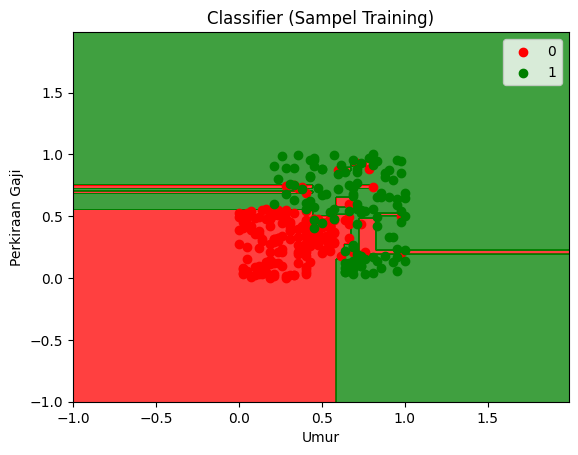

In [ ]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Classifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

<ipython-input-43-828224ac78e1>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


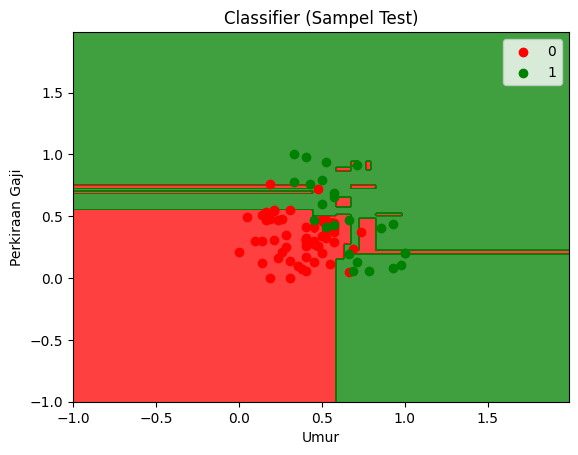

In [ ]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Classifier (Sampel Test)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

### Logistic Regression

In [ ]:
# Buat Klasifier dengan LinearRegression
classifier = LogisticRegression()

# Melatih model dengan menggunakan data latih
classifier = classifier.fit(X_train, y_train)

# Melakukan prediksi pada X_test
y_pred = classifier.predict(X_test)

# buat confussion matrix & skor akurasi
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 85.0%
Confussion Matrix : 
[[54  2]
 [10 14]]


### Melakukan Visualisasi Data Train dan Data Test

<ipython-input-45-22e551d77289>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


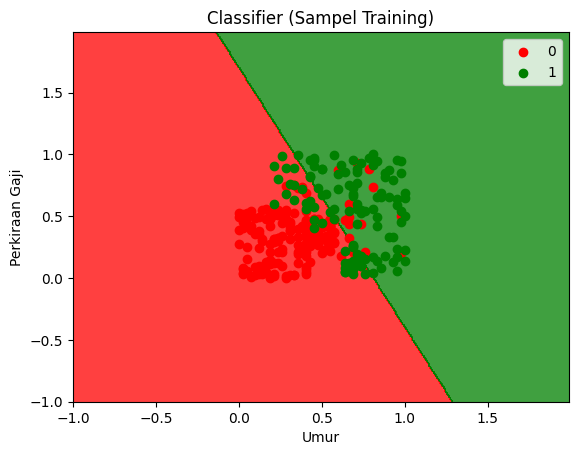

In [ ]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Classifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

<ipython-input-46-6b881b1f4cc7>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


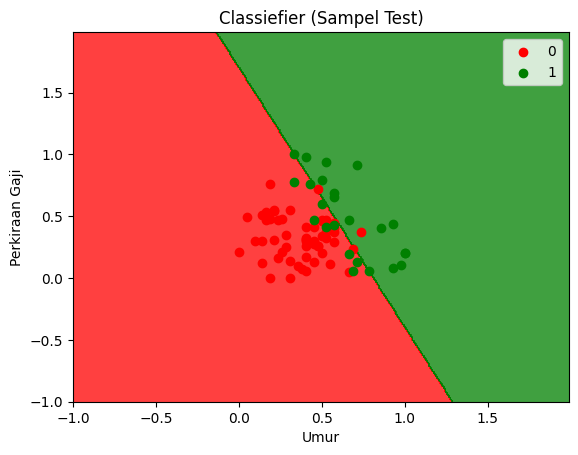

In [ ]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Classiefier (Sampel Test)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

### Membuat Decision Tree

In [ ]:
# Membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: %.2f%%' % (acc_secore * 100))

Accuracy: 81.20%


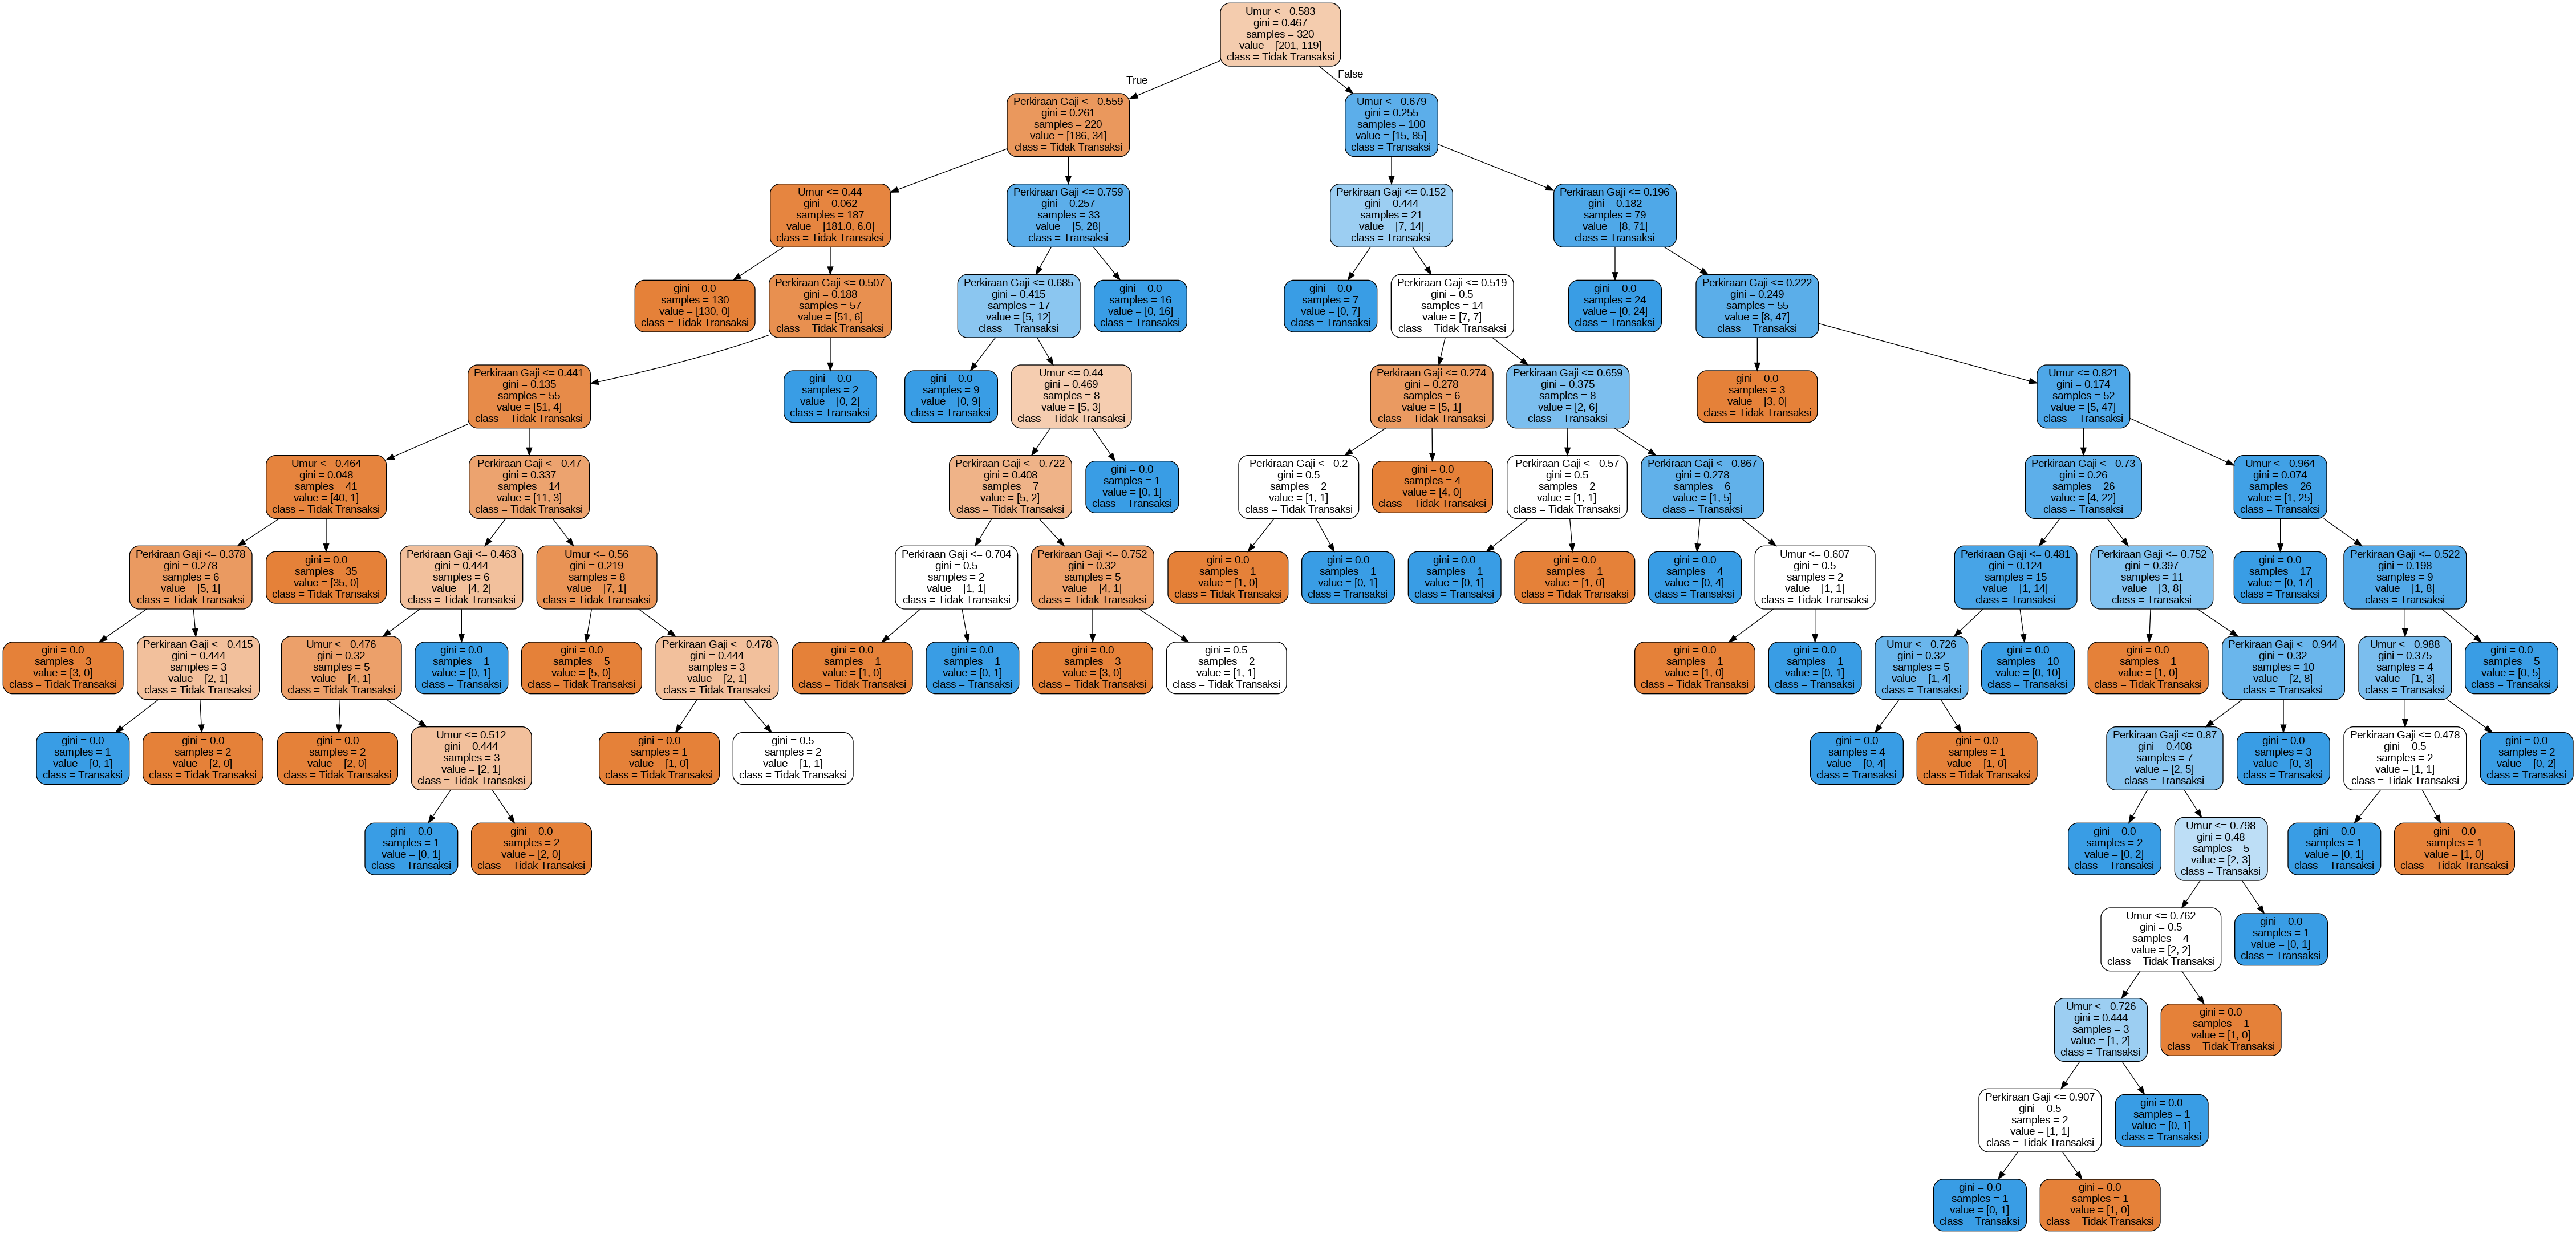

In [ ]:
export_graphviz(
    tree_model,
    out_file="iklan_sosmed_tree.dot",
    feature_names=['Umur', 'Perkiraan Gaji'],
    class_names=['Tidak Transaksi', 'Transaksi'],
    rounded=True,
    filled=True
)
# Render graphviz ke PNG
dot_file = "iklan_sosmed_tree.dot"
graph = Source.from_file(dot_file)
graph.format = 'png'

# view=False agar tidak terbuka window eksternal
graph.render(filename='iklan_sosmed_tree', cleanup=True, view=False)

display(Image(filename='iklan_sosmed_tree.png'))

## Melakukan Tunning

### Decision Tree

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
param_tree = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_tree, cv=5)
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
y_pred = best_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 88.75%
Confussion Matrix : 
[[51  5]
 [ 4 20]]


<ipython-input-50-71b61ff8323c>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


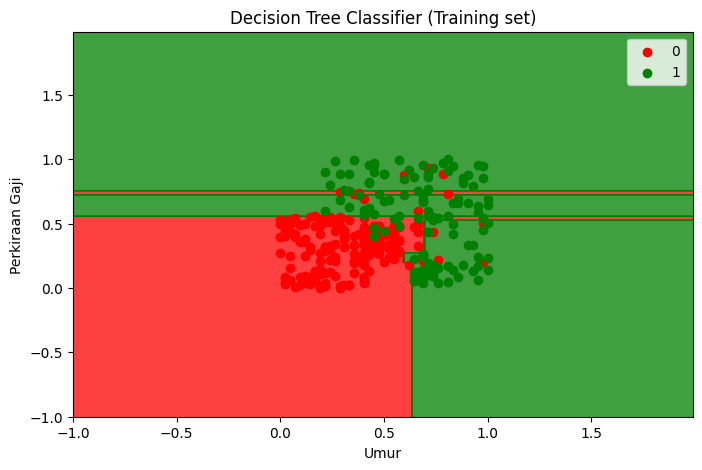

In [ ]:
# Visualisasi untuk TRAINING SET
X_set, y_set = X_train, y_train

# Pastikan X_set hanya punya 2 fitur untuk visualisasi
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.figure(figsize=(8, 5))
plt.contourf(X1, X2, best_tree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()

<ipython-input-51-4201e8895dd9>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


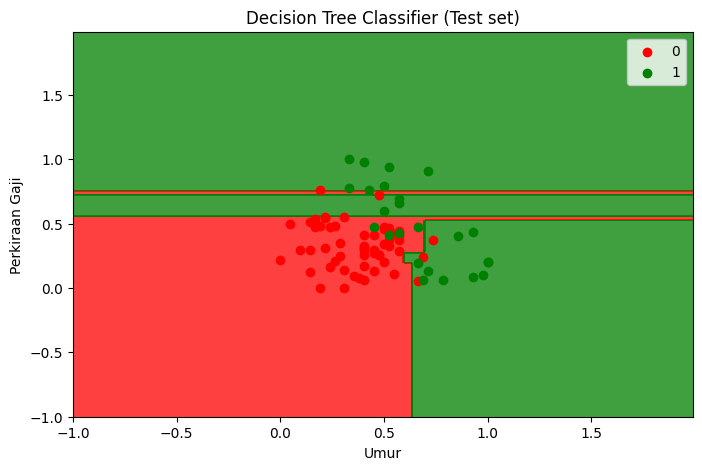

In [ ]:
# Visualisasi untuk test set
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.figure(figsize=(8, 5))
plt.contourf(X1, X2, best_tree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()

### Logistic Regression

In [ ]:
# Pipeline untuk preprocessing + klasifikasi
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga', max_iter=1000))
])

# Parameter Grid
param_logreg = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    'logreg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    # Akan diabaikan jika penalty != elasticnet
    'logreg__l1_ratio': [0, 0.1, 0.5, 0.9, 1]
}

# Grid Search
grid = GridSearchCV(pipeline, param_logreg, cv=5,
                    scoring='accuracy', n_jobs=-1, error_score='raise')
grid.fit(X_train, y_train)

# Hasil prediksi
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi: {:.2f}%".format(acc * 100))
print("Confusion Matrix:")
print(cm)

Akurasi: 87.50%
Confusion Matrix:
[[52  4]
 [ 6 18]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


<ipython-input-54-17a63d79574b>:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


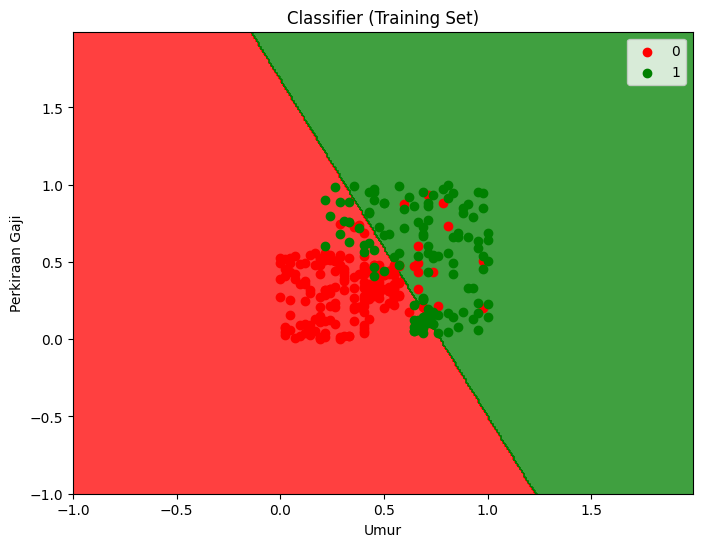

In [ ]:
# Ambil model terbaik
best_model = grid.best_estimator_

# Set data training
X_set, y_set = X_train, y_train

# Buat grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1, step=0.01)
)

# Prediksi untuk setiap titik dalam grid
pred_grid = best_model.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, pred_grid, alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot titik data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Classifier (Training Set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()

<ipython-input-55-fcc787ea4b87>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


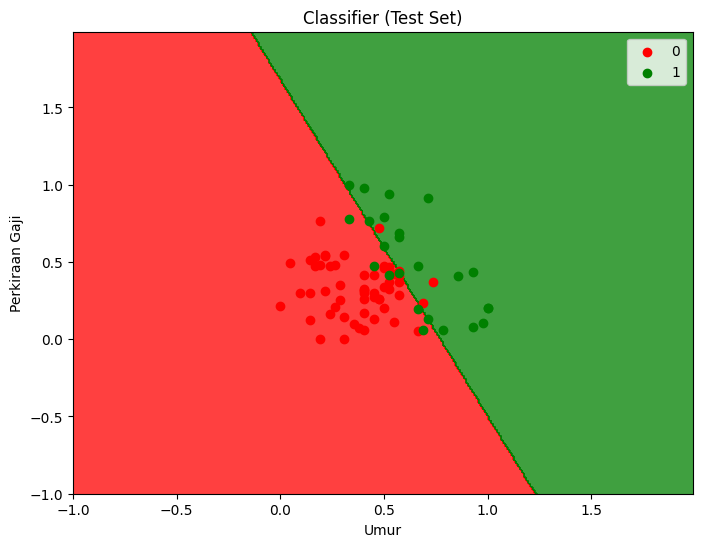

In [ ]:
# Set data test
X_set, y_set = X_test, y_test

# Buat grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1, step=0.01)
)

# Prediksi untuk setiap titik dalam grid
pred_grid = best_model.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, pred_grid, alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot titik data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Classifier (Test Set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()

## Nomor 2

### Import Library

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

### Load Dataset

In [57]:
# load dataset
dataset = pd.read_csv('Data_Gaji.csv', delimiter=';')
dataset.head()

,Tahun_Pengalaman,Gaji
0,1.1,590145000
1,1.3,693075000
2,1.5,565965000
3,2.0,652875000
4,2.2,598365000


### Menampilkan Properti Data

In [58]:
dataset.shape

(30, 2)

In [59]:
dataset.dtypes

,0
Tahun_Pengalaman,float64
Gaji,int64


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tahun_Pengalaman  30 non-null     float64
 1   Gaji              30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


### Cek Missing Value dan Duplikasi Data

In [63]:
dataset.isnull().sum()

,0
Tahun_Pengalaman,0
Gaji,0


In [64]:
dataset.duplicated().sum()

np.int64(0)

### Memisahkan Data Fitur dan Data Label

In [65]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

### Train Test Split

In [66]:
# Membagi dataset menjadi 80% Data Training dan 20% Data Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [67]:
# ubah dari dataframe / series pandas menjadi np.array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [68]:
# Normalisasi dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Buat Classifier dan Lakukan Training

#### Linear Regression

In [69]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [70]:
# Prediksi Data Test
y_pred = regressor.predict(X_test)

In [71]:
y_pred

array([1.53964675e+09, 1.60898026e+09, 1.10977904e+09, 9.57245333e+08,
       1.38711305e+09, 1.73378056e+09])

In [72]:
y_test

array([1707180000, 1641465000,  990435000,  854355000, 1474095000,
       1689525000])

In [73]:
# Menghitung prediksi harga kamar berdasarkan data training
y_pred = regressor.predict(X_test)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung Coefficient of Determination (R-squared)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 1.0579413688280266e+16
Coefficient of Determination (R-squared): 0.9102354571044844


### Melakukan Visualisasi Data Train dan Data Test

Text(0, 0.5, 'Gaji')

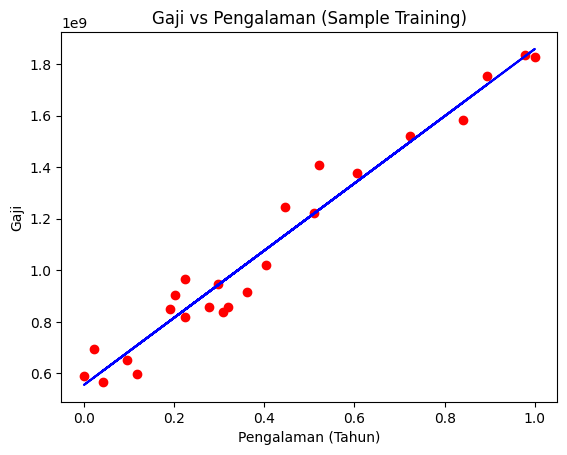

In [74]:
# Visualisasikan sample training
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Training)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')

Text(0, 0.5, 'Gaji')

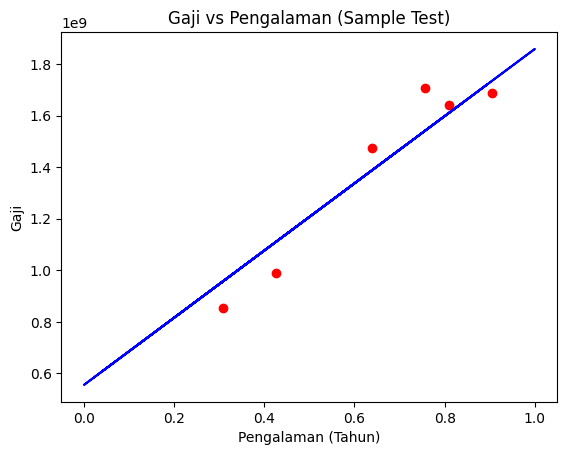

In [75]:
# Visualisasikan sample test
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Test)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')

### Melakukan Tunning

#### Liner Regression

In [76]:
regressor = LinearRegression(
    fit_intercept=True,   # Apakah menambahkan intersep (bias). Default: True
    copy_X=True,          # Apakah menyalin X sebelum diproses. Default: True
    # Jumlah core CPU yang dipakai untuk perhitungan. Bisa di-set -1 biar semua core
    n_jobs=None,
    positive=False        # Jika True, hanya menghasilkan koefisien positif
)

param_ridge = {
    'fit_intercept': [True, False],
    'copy_X': [True],
    'n_jobs': [-1],
    # Tapi ini hanya didukung mulai scikit-learn versi 0.24
    'positive': [False, True]
}

regressor = LinearRegression()
grid_tree = GridSearchCV(regressor, param_ridge, cv=5)
grid_tree.fit(X_train, y_train)
y_pred = grid_tree.predict(X_test)

In [77]:
# Prediksi dengan model terbaik
y_pred = grid_tree.predict(X_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Cetak hasil
print("Best Parameters:", grid_tree.best_params_)
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
R² Score: 0.9102354571044844
Mean Squared Error (MSE): 1.0579413688280266e+16
Mean Absolute Error (MAE): 92248312.4591556


In [78]:
# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung Coefficient of Determination (R-squared)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 1.0579413688280266e+16
Coefficient of Determination (R-squared): 0.9102354571044844


Text(0, 0.5, 'Gaji')

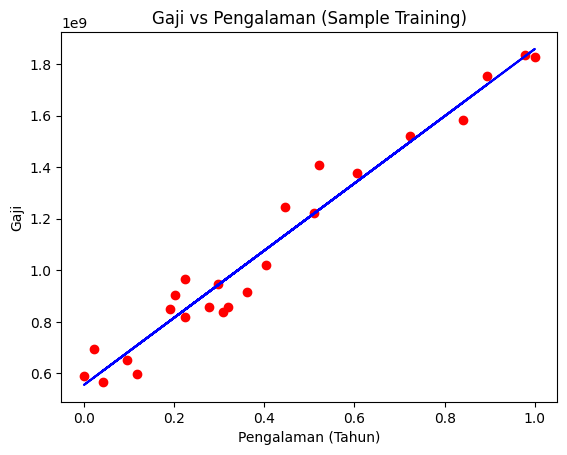

In [79]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, grid_tree.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Training)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')

Text(0, 0.5, 'Gaji')

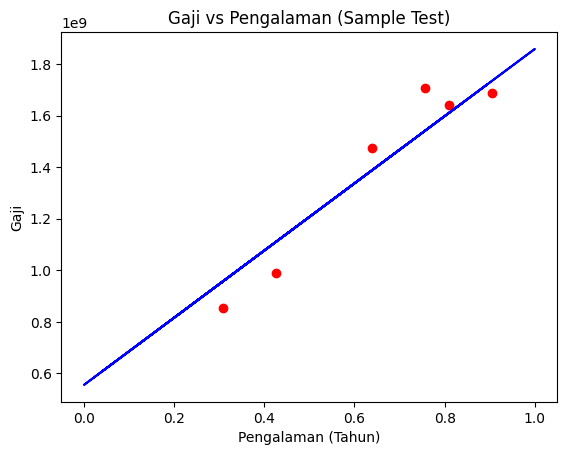

In [80]:
# Visualisasikan sample test
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, grid_tree.predict(X_train), color='blue')
plt.title('Gaji vs Pengalaman (Sample Test)')
plt.xlabel('Pengalaman (Tahun)')
plt.ylabel('Gaji')